# Assignment 7

## Data Science 101
- Name: Truc Duong
- Email: trucdg@bu.edu
- BUID: U40568683

## Title: Exploratory Data Analysis (EDA) and Hypothesis Testing

### Exploring: Student Performance Dataset
- Description: Includes data on student grades, demographic, social and school-related features from two Portuguese schools.

## 1. Importing Data and Libraries:


In [45]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
!pwd

/Users/trucduong/Desktop/DS219/github/spark-seprep/assignments/assignment7/trucduong-a07


In [47]:
# Read the CSV file into DataFrame
# Two datasets are provided regarding the performance in two distinct subjects: 
# Mathematics (mat) and Portuguese language (por)

# import dataset for student performance in Mathematics
file_path1 = "./student_performance_dataset/student/student-mat.csv"
df_mat = pd.read_csv(file_path1,sep=';')

# import dataset for student performance in Portuguese
file_path2 = "./student_performance_dataset/student/student-por.csv"
df_por = pd.read_csv(file_path2, sep=';')

In [48]:
# preview dataset
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [49]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## 2. Exploratory Data Analysis (EDA):

In [50]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [51]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [52]:
df_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

**Note:**
- Since the dataset for Mathematics and Portuguese subject have the same structure, I'll analyze the dataset for Mathematics, and the same assumptions can be done for Portuguese


### The dataset at the first glance:
1. There are 395 student records for the Mathematics subject dataset.
2. There are 648 student records for the Portuguese subject dataset. 
3. Each dataset has 33 fields. Here's a concise summary of the dataset:

**Demographic Information:**
- `school`: GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira
- `sex`: Specifies the gender of the students.
- `age`: Represents the age of each student.
- `address`: 'U' - urban or 'R' - rural.
- `famsize`: 'LE3' - less or equal to 3 or 'GT3' - greater than 3.
- `Pstatus`: 'T' - living together or 'A' - apart

Educational Background:
- `Medu`: numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education
- `Fedu`: same notation as Medu
- `Mjob`: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other'
- `Fjob`: same notation as Mjob

School-related Factors:
- `reason`:close to 'home', school 'reputation', 'course' preference or 'other'.
- `guardian`:'mother', 'father' or 'other'.
- `traveltime`: numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour.
- `studytime`: numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours.
- `failures`: number of past class failures (numeric: n if 1<=n<3, else 4.

Support and Activities:
- `schoolsup`: binary: yes or no
- `famsup`: yes or no
- `paid`: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no).
- `activities`: Indicates participation in extracurricular activities (yes or no).
- `nursery`: Indicates if the student attended nursery school (yes or no).
- `higher`: Indicates if the student aspires to higher education (yes or no).
- `internet`: Indicates if the student has internet access at home (yes or no).
- `romantic`: Indicates if the student is in a romantic relationship (yes or no).

Social and Health Factors:
- `famrel`: from 1 - very bad to 5 - excellent
- `freetime`: from 1 - very low to 5 - very high
- `goout`: from 1 - very low to 5 - very high
- `Dalc`: workday alcohol consumption from 1 - very low to 5 - very high
- `Walc`: weekend alcohol consumption from 1 - very low to 5 - very high
- `health`: current health status (numeric: from 1 - very bad to 5 - very good)
- `absences`: number of school absences (numeric: from 0 to 93)

Academic Performance:
- `G1`: Represents the first period grade (0-20)
- `G2`: Represents the second period grade (0-20)
- `G3`: Represents the final grade (0-20)


### 2.0 Dataset Statistics


**Mathematics:**

In [53]:
df_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


***Observation:***
- Student age ranges from 15 to 22. And the legal drinking age in Portuguese is 18.
- On average, students who take mathematics courses spend around 2 hours studying per day and report relatively good health, with an average health rating of approximately 3.55 out of 5.
- While most students have no past class failures, there is a wide range in the number of absences, with some students having as many as 75 absences. This suggests variability in attendance patterns among students taking mathematics courses.
- The Mathematic grade statistics for 3 study periods G1, G2 and G3 are relatively the same.

In [54]:
df_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


***Observation:***
- On average, students enrolled in Portuguese courses are around 16.74 years old, with slightly lower parental education levels compared to the overall dataset. The mean education level for mothers is approximately 2.51, and for fathers, it's around 2.31.
- most Portuguese students have not failed any classes in the past. However, there is variability in the number of absences, with some students having as many as 32 absences. 
- In terms of academic performance in Portuguese, the mean grades for periods G1, G2, and G3 are approximately 11.40, 11.57, and 11.91 respectively. These scores are slightly higher.

### 2.1 Genders vs Subject distribution

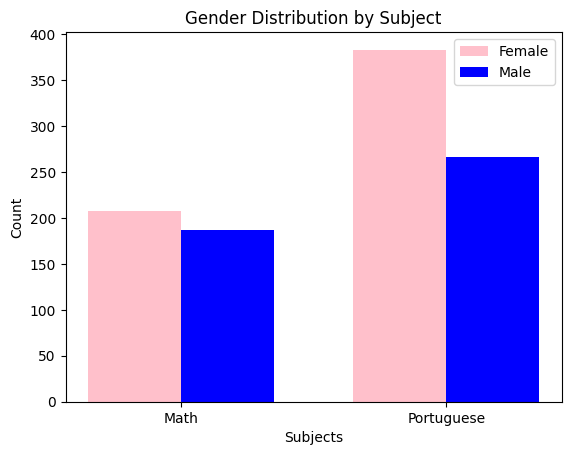

In [55]:
# Data
subjects = ['Math', 'Portuguese']
f_counts = []
m_counts = []

# count the number of F and M students taking math
gender_counts_math = df_mat['sex'].value_counts()
f_counts += [gender_counts_math.to_list()[0]] # 0 is female
m_counts += [gender_counts_math.to_list()[1]] # 1 is male

# count the number of F and M students taking math
gender_counts_por = df_por['sex'].value_counts()
f_counts += [gender_counts_por.to_list()[0]] # 0 is female
m_counts += [gender_counts_por.to_list()[1]] # 1 is male

# Plotting the bar chart
bar_width = 0.35
index = range(len(subjects))

plt.bar(index, f_counts, bar_width, label='Female', color='pink')
plt.bar([i + bar_width for i in index], m_counts, bar_width, label='Male', color='blue')

# Adding title and labels
plt.xlabel('Subjects')
plt.ylabel('Count')
plt.title('Gender Distribution by Subject')
plt.xticks([i + bar_width/2 for i in index], subjects)
plt.legend()

# Displaying the plot
plt.show()


***Observation:***
- Portuguese enrollment is significantly higher than Math for both genders, indicating its popularity. This is reasonable since the 2 surveyed school are Portuguese secondary schools.
- There's a slight gender disparity in Math enrollment, with more females than males, while Portuguese shows a notable gender imbalance with more females enrolled.

### 2.2 Average grades between the 2 surveyed schools

Average Mathematic grades by school:
               G1         G2         G3
school                                 
GP      10.939828  10.782235  10.489971
MS      10.673913  10.195652   9.847826

Average Portuguese grades by school:
               G1         G2         G3
school                                 
GP      11.985816  12.144208  12.576832
MS      10.300885  10.495575  10.650442


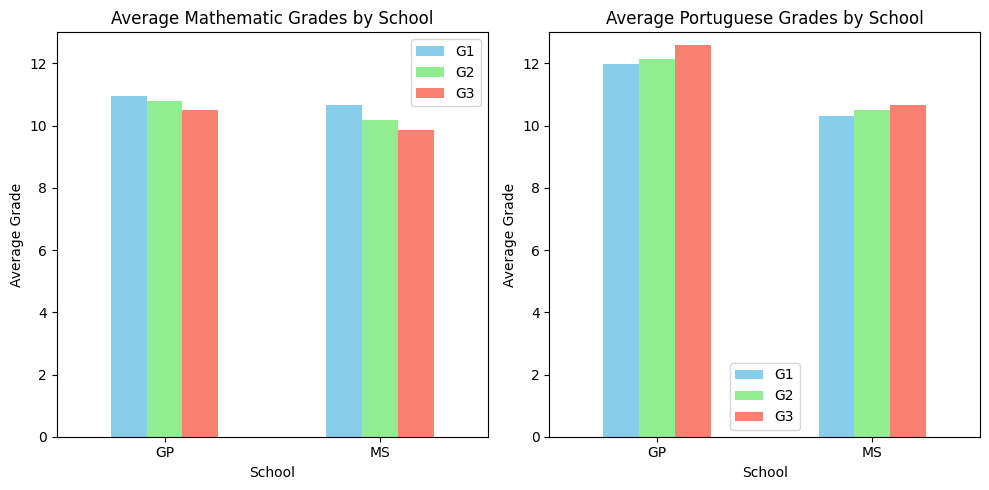

In [56]:
# Group by school and calculate the average grades
average_mat_grades_by_school = df_mat.groupby("school")[['G1', 'G2', 'G3']].mean()

# Print the average grades
print("Average Mathematic grades by school:")
print(average_mat_grades_by_school)

# Group by school and calculate the average grades
average_por_grades_by_school = df_por.groupby("school")[['G1', 'G2', 'G3']].mean()

print()

# Print the average grades
print("Average Portuguese grades by school:")
print(average_por_grades_by_school)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Define colors for each grade
colors = ['skyblue', 'lightgreen', 'salmon']

# Plotting the bar chart for Mathematics grades
average_mat_grades_by_school.plot(kind='bar', ax=axs[0], color=colors)

# Adding title and labels for Mathematics subplot
axs[0].set_title('Average Mathematic Grades by School')
axs[0].set_xlabel('School')
axs[0].set_ylabel('Average Grade')
axs[0].set_xticklabels(average_mat_grades_by_school.index, rotation=0)  # Rotate x-axis labels if needed
axs[0].set_ylim(0, 13)


# Plotting the bar chart for Portuguese grades
average_por_grades_by_school.plot(kind='bar', ax=axs[1], color=colors)

# Adding title and labels for Portuguese subplot
axs[1].set_title('Average Portuguese Grades by School')
axs[1].set_xlabel('School')
axs[1].set_ylabel('Average Grade')
axs[1].set_xticklabels(average_por_grades_by_school.index, rotation=0)  # Rotate x-axis labels if needed
axs[1].set_ylim(0, 13)

# Adjust layout
plt.tight_layout()

# Displaying the plot
plt.show()



***Observations:***
 - We can se that in general, students from Gabriel Pereira (GP) school have higher average grades across all three grades (G1, G2, G3) compared to students from Mousinho da Silveira (MS) school, especially in the Portuguese subject.
 - Based on the data, it seems that students have higher averages across 3 study periods in Portuguese than in Mathematics. 
 - Interestingly, while students seem to have a lower performance in period G3 in Mathematics compared to period G1, and G2, there is a trend of improvement in Portuguese grades from the first period (G1) to the final period (G3).

***Below are boxplots demonstrating Mathematics and Portuguese grade between the 2 schools***

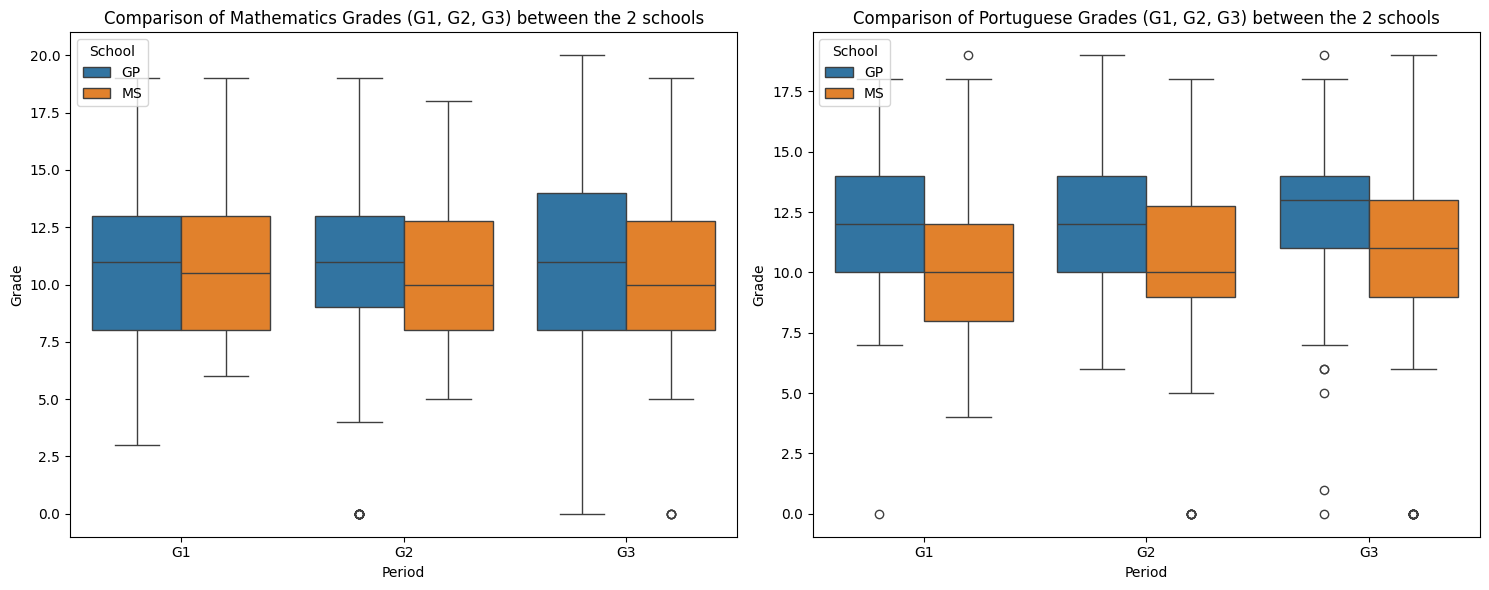

In [57]:

# Selecting only the columns related to school and grades (G1, G2, G3) for mathematics
math_data = df_mat[['school', 'G1', 'G2', 'G3']].copy()

# Melt the DataFrame to reshape it for easier plotting
math_data_melted = math_data.melt(id_vars='school', var_name='Period', value_name='Grade')

# Selecting only the columns related to school and grades (G1, G2, G3) for Portuguese
por_data = df_por[['school', 'G1', 'G2', 'G3']].copy()

# Melt the DataFrame to reshape it for easier plotting
por_data_melted = por_data.melt(id_vars='school', var_name='Period', value_name='Grade')

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting mathematics grades
sns.boxplot(data=math_data_melted, x='Period', y='Grade', hue='school', ax=axes[0])
axes[0].set_title('Comparison of Mathematics Grades (G1, G2, G3) between the 2 schools')
axes[0].set_xlabel('Period')
axes[0].set_ylabel('Grade')
axes[0].legend(title='School', loc='upper left')

# Plotting Portuguese grades
sns.boxplot(data=por_data_melted, x='Period', y='Grade', hue='school', ax=axes[1])
axes[1].set_title('Comparison of Portuguese Grades (G1, G2, G3) between the 2 schools')
axes[1].set_xlabel('Period')
axes[1].set_ylabel('Grade')
axes[1].legend(title='School', loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


## 3. Hypothesis Formulation:

## Hypothesis 1: Family Support and Academic Performance
**Hypothesis**: Students who receive additional family support (famsup) are more likely to achieve higher final grades (G3) compared to students without family support.

***Mathematics subject:***

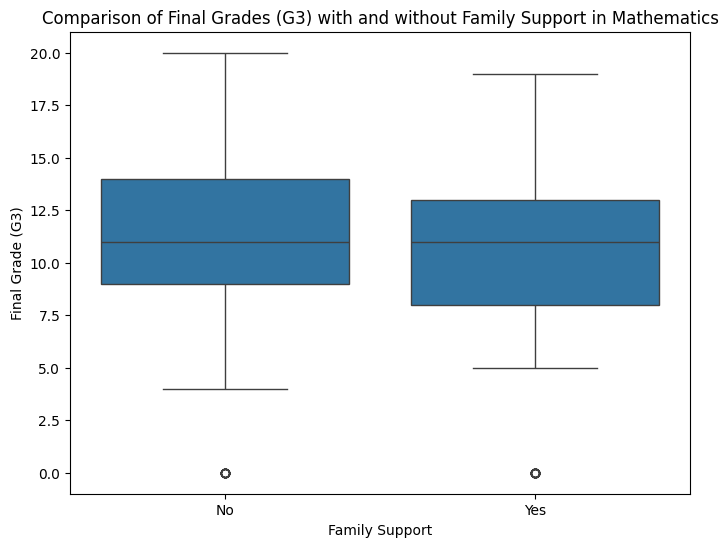

        count       mean       std  min  25%   50%   75%   max
famsup                                                        
no      153.0  10.640523  4.636262  0.0  9.0  11.0  14.0  20.0
yes     242.0  10.272727  4.550318  0.0  8.0  11.0  13.0  19.0


In [58]:
# Mathematics
#filter the data to include only the relevant columns
hyp1_mat_data = df_mat[['famsup', 'G3']].copy()

# Create a box plot to compare final grades (G3) between students with and without family support
plt.figure(figsize=(8, 6))
sns.boxplot(x='famsup', y='G3', data=hyp1_mat_data)
plt.title('Comparison of Final Grades (G3) with and without Family Support in Mathematics')
plt.xlabel('Family Support')
plt.ylabel('Final Grade (G3)')
plt.xticks([0, 1], ['No', 'Yes'])  # Replace 0 and 1 with 'No' and 'Yes'
plt.show()

# Calculate summary statistics for final grades (G3) based on family support
mat_stats = hyp1_mat_data.groupby('famsup')['G3'].describe()
print(mat_stats)


***Observations:***
- There are 153 students who do not receive family support (famsup = 'no'), and 242 students who do receive family support (famsup = 'yes').
- The mean final grade (G3) for students without family support is approximately 10.64, while for students with family support, it is slightly lower at around 10.27.
- The standard deviation of final grades is similar for both groups, with students without family support having a slightly higher standard deviation (4.64) compared to students with family support (4.55).
- Overall, there is not a significant difference in the mean final grades between students with and without family support.

=> Based on these observations, the hypothesis that students who receive additional family support are more likely to achieve higher final grades does not seem strongly supported by this data of students taking Mathematics. 

***Portuguese subject:***

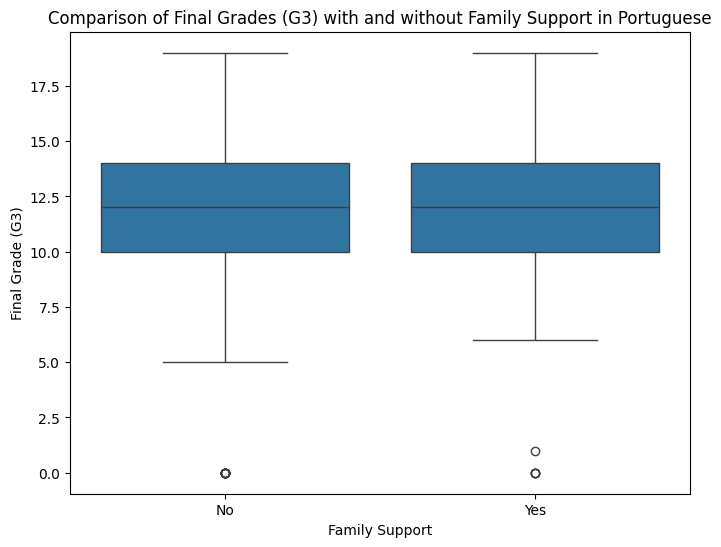

        count       mean       std  min   25%   50%   75%   max
famsup                                                         
no      251.0  11.665339  3.602160  0.0  10.0  12.0  14.0  19.0
yes     398.0  12.057789  2.967358  0.0  10.0  12.0  14.0  19.0


In [59]:
# Portuguese
# filter the data to include only the relevant columns
hyp1_por_data = df_por[['famsup', 'G3']].copy()

# Create a box plot to compare final grades (G3) between students with and without family support
plt.figure(figsize=(8, 6))
sns.boxplot(x='famsup', y='G3', data=hyp1_por_data)
plt.title('Comparison of Final Grades (G3) with and without Family Support in Portuguese')
plt.xlabel('Family Support')
plt.ylabel('Final Grade (G3)')
plt.xticks([0, 1], ['No', 'Yes'])  # Replace 0 and 1 with 'No' and 'Yes'
plt.show()

# Calculate summary statistics for final grades (G3) based on family support
por_stats = hyp1_por_data.groupby('famsup')['G3'].describe()
print(por_stats)

***Observations:***
- There are 251 students who do not receive family support (famsup = 'yes') and 398 students who have support from the family.
- Students with family support who take the Portuguese subject tend to have slightly higher mean final grades (12.05) compared to students without family support (11.6).
 
 => Thus, these observations support the hypothesis that students who receive additional family support are more likely to achieve higher final grades in the Portuguese subject

**Overall Conclusion:**

- The analysis of students taking the Portuguese subject supports the hypothesis that family support correlates with higher final grades (G3). However, this correlation is not observed in the data for students taking Mathematics.

- One possible explanation for this discrepancy is that while family support may play a significant role in academic performance for certain subjects, it may not be the sole determining factor. Further investigation is needed to identify other potential variables that could influence student performance in both subjects. 

## Hypothesis 2: Alcohol Consumption and Academic Performance
**Hypothesis**: Students who report higher alcohol consumption levels during weekdays (Dalc) and weekends (Walc) will, on average, have lower final grades (G3) compared to students with lower alcohol consumption levels.

Statistics for Workday Alcohol Consumption vs. Math Final Grade:
      count       mean       std  min   25%   50%    75%   max
Dalc                                                          
1     276.0  10.731884  4.676502  0.0   9.0  11.0  14.00  20.0
2      75.0   9.253333  4.812970  0.0   8.0  10.0  12.00  18.0
3      26.0  10.500000  3.443835  0.0   9.0  10.0  12.75  17.0
4       9.0   9.888889  2.619372  5.0   9.0   9.0  12.00  13.0
5       9.0  10.666667  2.692582  5.0  10.0  11.0  13.00  13.0

Statistics for Weekend Alcohol Consumption vs. Math Final Grade:
      count       mean       std  min  25%   50%   75%   max
Walc                                                        
1     151.0  10.735099  5.133812  0.0  8.5  11.0  14.5  20.0
2      85.0  10.082353  4.950257  0.0  8.0  11.0  14.0  19.0
3      80.0  10.725000  3.700753  0.0  9.0  10.0  13.0  18.0
4      51.0   9.686275  3.619338  0.0  8.0  10.0  12.0  17.0
5      28.0  10.142857  4.125030  0.0  8.0  10.0  13.0  18.0


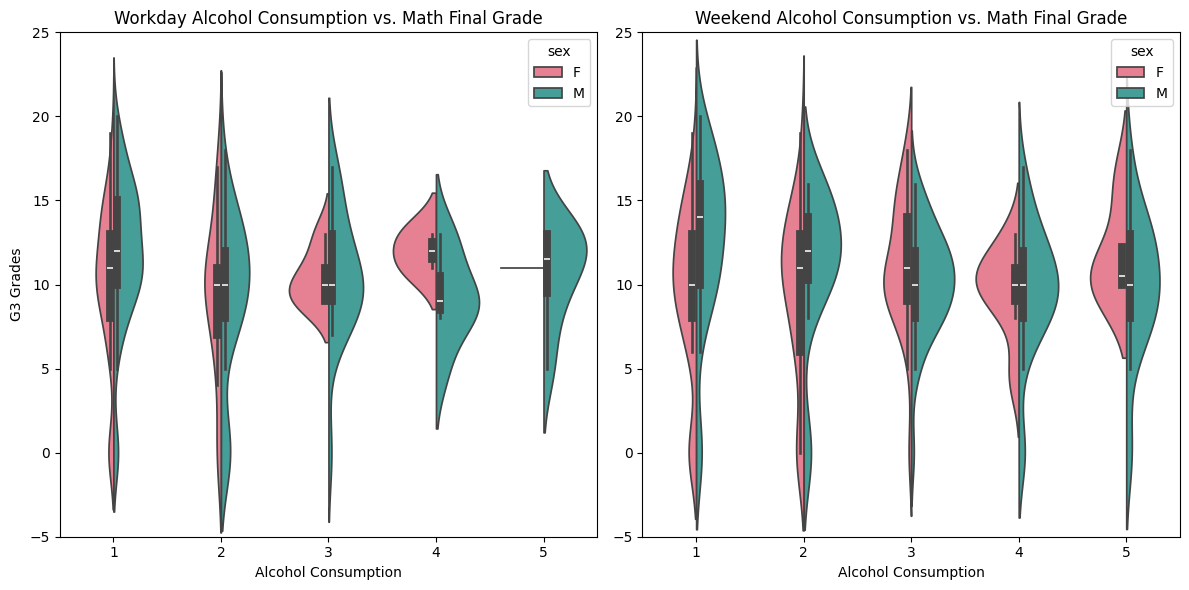

In [60]:
# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Violin Plot for Workday Alcohol Consumption vs. Math Final Grade
plt.subplot(1, 2, 1)
sns.violinplot(x='Dalc', y='G3', data=df_mat, hue='sex', split=True, palette='husl')
plt.title('Workday Alcohol Consumption vs. Math Final Grade')
plt.ylim(-5, 25)  # Set y-axis range
plt.xlabel('Alcohol Consumption')  # Label x-axis
plt.ylabel('G3 Grades')  # Label y-axis

# Get statistics for each group
statistics_dalc = df_mat.groupby('Dalc')['G3'].describe()
print('Statistics for Workday Alcohol Consumption vs. Math Final Grade:')
print(statistics_dalc)

# Violin Plot for Weekend Alcohol Consumption vs. Math Final Grade
plt.subplot(1, 2, 2)
sns.violinplot(x='Walc', y='G3', data=df_mat, hue='sex', split=True, palette='husl')
plt.title('Weekend Alcohol Consumption vs. Math Final Grade')
plt.ylim(-5, 25)  # Set y-axis range
plt.xlabel('Alcohol Consumption')  # Label x-axis
plt.ylabel('')  # Empty y-axis label to avoid repetition

# Get statistics for each group
statistics_walc = df_mat.groupby('Walc')['G3'].describe()
print('\nStatistics for Weekend Alcohol Consumption vs. Math Final Grade:')
print(statistics_walc)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


***Observation:***
- Notably, the group with the lowest workday alcohol consumption (Dalc=1) exhibits a higher maximum Math final grade compared to the group with the highest consumption level (Dalc=5). However, the observed data is not the same for weekend alcohol consumption.
- We can notice that Male students tend to have higher alcohol consumption that Female students. There is almost 0 female student who heavily consume alcohol (level 5) during workday.
- There is significant variability in Math final grades within each level of alcohol consumption, as indicated by the standard deviation values. This suggests that factors other than alcohol consumption may play a substantial role in academic performance

=> These observations suggest that while there may be some association between alcohol consumption levels and Math final grades, the relationship is not linear or consistent across all levels.

Statistics for Workday Alcohol Consumption vs. Portuguese Final Grade:
      count       mean       std  min   25%   50%   75%   max
Dalc                                                         
1     451.0  12.299335  3.102898  0.0  10.0  12.0  14.0  19.0
2     121.0  11.363636  3.329164  0.0  10.0  11.0  13.0  18.0
3      43.0  11.139535  2.252844  8.0  10.0  11.0  12.0  18.0
4      17.0   8.941176  5.129213  0.0   9.0  11.0  12.0  14.0
5      17.0  10.235294  2.948080  5.0   9.0  10.0  11.0  16.0

Statistics for Weekend Alcohol Consumption vs. Portuguese Final Grade:
      count       mean       std  min  25%   50%   75%   max
Walc                                                        
1     151.0  10.735099  5.133812  0.0  8.5  11.0  14.5  20.0
2      85.0  10.082353  4.950257  0.0  8.0  11.0  14.0  19.0
3      80.0  10.725000  3.700753  0.0  9.0  10.0  13.0  18.0
4      51.0   9.686275  3.619338  0.0  8.0  10.0  12.0  17.0
5      28.0  10.142857  4.125030  0.0  8.0  10.0  13.0  1

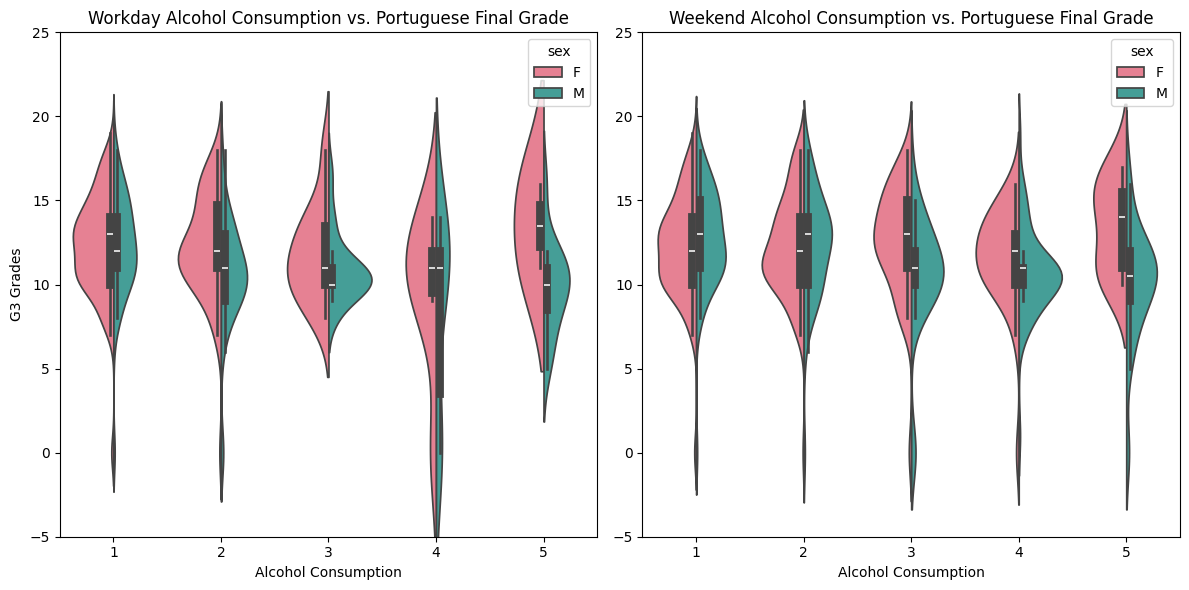

In [61]:
# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Violin Plot for Workday Alcohol Consumption vs. Portuguese Final Grade
plt.subplot(1, 2, 1)
sns.violinplot(x='Dalc', y='G3', data=df_por, hue='sex', split=True, palette='husl')
plt.title('Workday Alcohol Consumption vs. Portuguese Final Grade')
plt.ylim(-5, 25)  # Set y-axis range
plt.xlabel('Alcohol Consumption')  # Label x-axis
plt.ylabel('G3 Grades')  # Label y-axis

# Get statistics for each group
statistics_dalc = df_por.groupby('Dalc')['G3'].describe()
print('Statistics for Workday Alcohol Consumption vs. Portuguese Final Grade:')
print(statistics_dalc)

# Violin Plot for Weekend Alcohol Consumption vs. Math Final Grade
plt.subplot(1, 2, 2)
sns.violinplot(x='Walc', y='G3', data=df_por, hue='sex', split=True, palette='husl')
plt.title('Weekend Alcohol Consumption vs. Portuguese Final Grade')
plt.ylim(-5, 25)  # Set y-axis range
plt.xlabel('Alcohol Consumption')  # Label x-axis
plt.ylabel('')  # Empty y-axis label to avoid repetition

# Get statistics for each group
statistics_walc = df_mat.groupby('Walc')['G3'].describe()
print('\nStatistics for Weekend Alcohol Consumption vs. Portuguese Final Grade:')
print(statistics_walc)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


***Observations:***
- The statistics reveal a trend where, on average, students reporting lower workday alcohol consumption levels (Dalc) tend to have higher Portuguese final grades (G3). For example, the mean final grade decreases from Dalc=1 to Dalc=5, suggesting a potential negative association between workday alcohol consumption and academic performance
- However, the trend is less clear for weekend alcohol consumption (Walc). While there is some variability in final grades across different Walc levels, the mean final grades do not consistently decrease with increasing Walc levels

=> Overall, the data partially supports the hypothesis. There is evidence to suggest that higher workday alcohol consumption levels are associated with lower Portuguese final grades, but the relationship is less straightforward for weekend alcohol consumption

## Hypothesis 3: Internet Access and Academic Performance
**Hypothesis**: Students with internet access at home (internet) will, on average, achieve higher final grades (G3) compared to students without internet access.

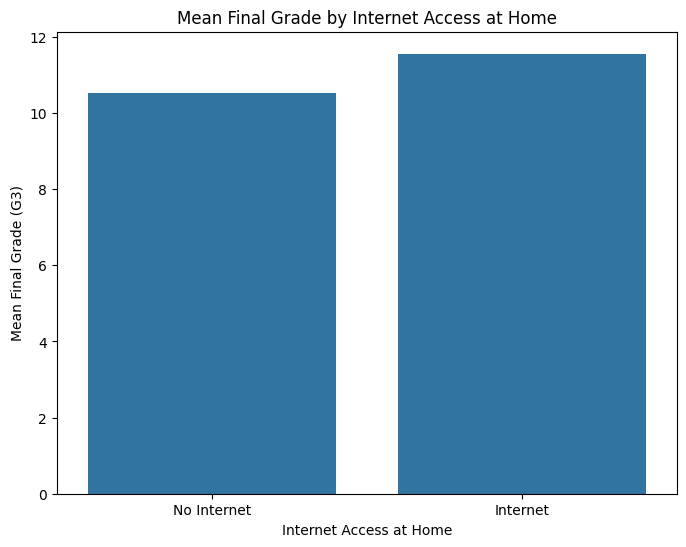

Statistics for Mean Final Grade by Internet Access at Home:
internet
no     10.534562
yes    11.553809
Name: G3, dtype: float64


In [62]:
# Combine data for Mathematics and Portuguese subjects
combined_data = pd.concat([df_mat[['internet', 'G3']], df_por[['internet', 'G3']]])

# Group data by 'internet' column
grouped_data = combined_data.groupby('internet')['G3']

# Calculate Mean Final Grade for each group
mean_grades = grouped_data.mean()

# Create Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_grades.index, y=mean_grades.values)
plt.title('Mean Final Grade by Internet Access at Home')
plt.xlabel('Internet Access at Home')
plt.ylabel('Mean Final Grade (G3)')
plt.xticks([0, 1], ['No Internet', 'Internet'])
plt.show()

# Print out statistics
print("Statistics for Mean Final Grade by Internet Access at Home:")
print(mean_grades)


*** Observations: ***
- The statistics show that students with internet access at home tend to have a higher mean final grade (11.55) compared to those without internet access (10.53).
- This trend holds true for both Mathematics and Portuguese subjects, indicating a potential positive association between internet access at home and academic performance.
 
 =>  Based on the statistics, the observations support the hypothesis that students with internet access at home achieve higher final grades on average compared to students without internet access.